## Pokemon Go Type Effectiveness Memorization! ;D
***

Recently, I put a bit of effort into making a number of flash cards on an amazing open source flashcard app called **Anki**. I wanted to learn and memorize the type effectiveness of the various types of pokemon, and I made a nice deck for myself to study! Unfortunately, I went to study today and found that my cards were gone! :(

> EDIT: Turns out I never synced/uploaded them from my Ankidroid mobile version of the app... But! I still want to automate this mf

#### Enter: Frustration

This pain reignited in me a passion to develop a time-saving, and automated solution for producing flash cards.

#### Enter: `genanki`

`genanki` is a Python3 library that allows you to programmatically generate flashcards for the Anki flashcard software. We will see how to use this shortly, but ultimately, we are left with the necessary `.apkg` file(s) necessary to create our decks.


### The Plan:

*  Gather Data using requests and beautiful soup to pull tables/data
*  Get it nice and parsed using pandas, likely? Idk, up to me, let's pull the request first
*  Use `genanki` to write cards from the organized data.



In [1]:
import requests
import bs4

# pull the http request, then get the text
source = requests.get('https://www.polygon.com/pokemon-go-guide/2020/2/4/21121160/type-strength-weakness-super-effective-weakness-chart').text

At this point, `source` is in a text format and looks like an HTML file. We want to run this through beautiful soup

In [12]:
soup = bs4.BeautifulSoup(source, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Pokémon Go type strength and weakness chart  - Polygon
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="Polygon" name="apple-mobile-web-app-title">
   <script src="https://optimize-stats.voxmedia.com/loader.min.js?key=6e06b9766c08ed8f" type="text/javascript">
   </script>
   <meta content="Julia Lee" property="author">
    <meta content="2020-02-04T11:14:08-05:00" property="article:published_time">
     <meta content="2020-02-04T11:14:08-05:00" property="article:modified_time"/>
     <meta content="340327135979921,1121292284586403,353942168328519,231096643968522" property="fb:pages"/>
     <link as="font" crossorigin="" href="https://cdn.vox-cdn.com/shared_fonts/unison/unison_base/nittigrotesk/nittigrotesk-normal.woff2" rel="preload" type=

Now we can run some cool soup methods on this soupy object. In particular, we are going to find the element we're interested in.

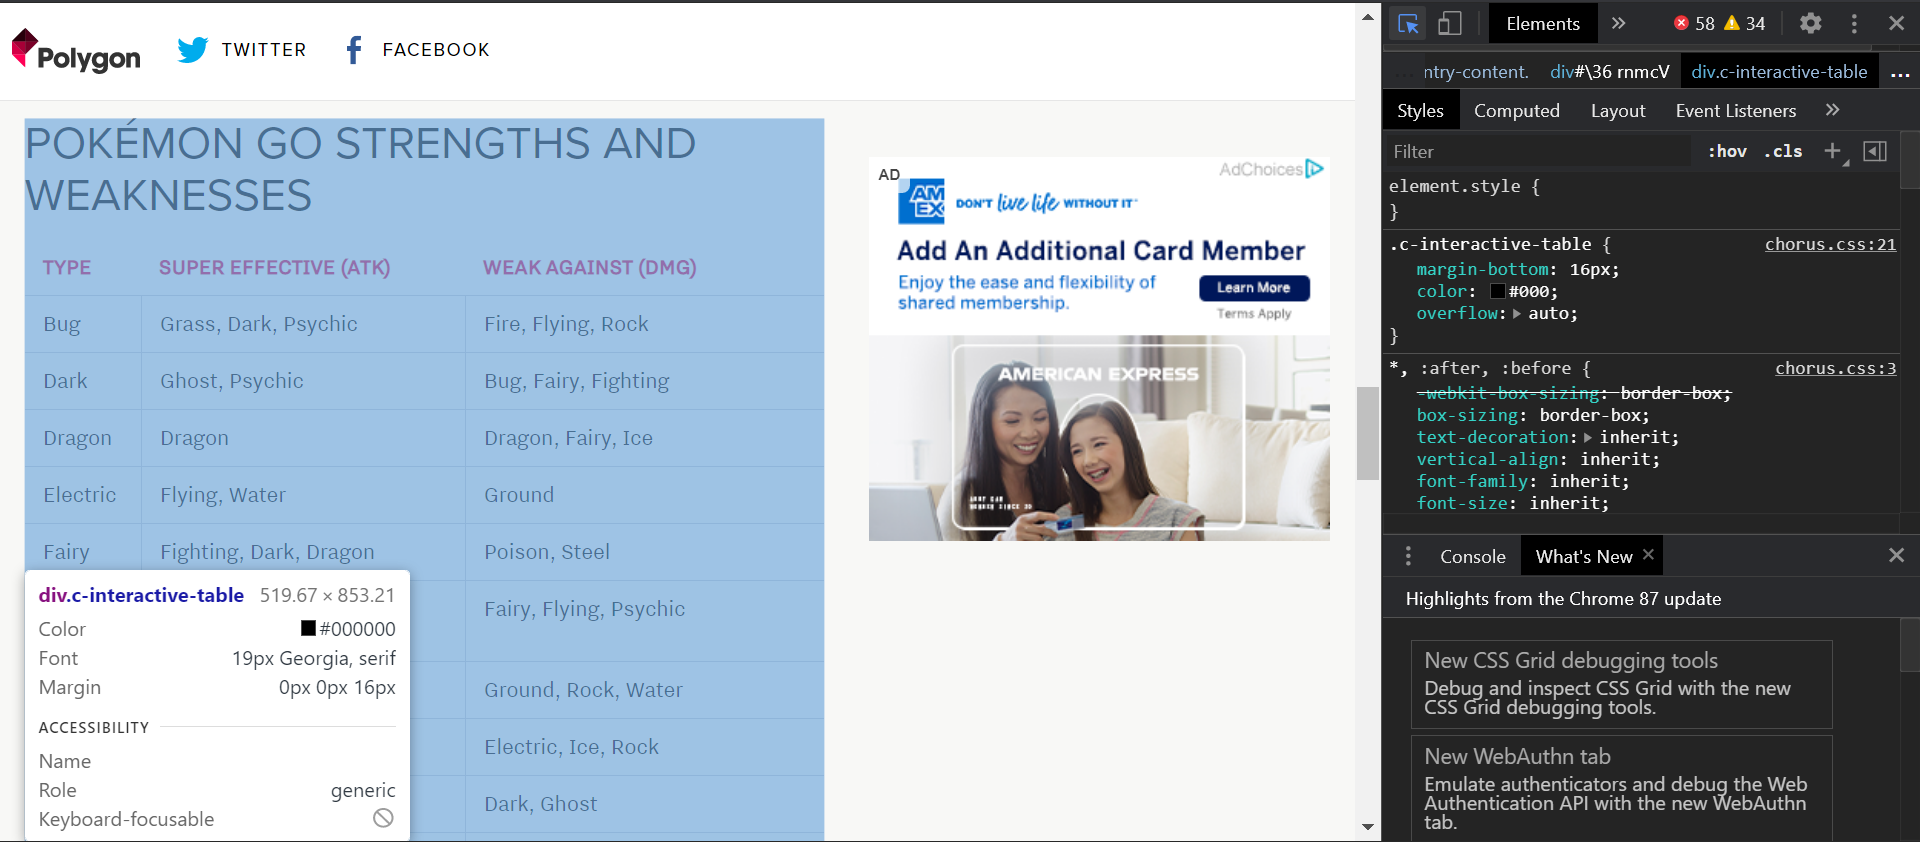

We need to run the `find` method to retrieve that weird div classed element: `div.c-interactive-table`.

In [15]:
table = soup.find(class_='c-interactive-table')
print(table)


<div class="c-interactive-table" data-cdata='{"paging":false,"searchable":false,"sort_column":0,"sort_descending":false,"sortable":false}' data-cid="apps/interactive_table-1611445649_5409_369831">
<h3>Pokémon Go Strengths and Weaknesses</h3>
<table class="p-data-table" width="100%">
<thead>
<tr>
<th>TYPE</th>
<th>SUPER EFFECTIVE (ATK)</th>
<th>WEAK AGAINST (DMG)</th>
</tr>
</thead>
<tfoot>
<tr>
<th>TYPE</th>
<th>SUPER EFFECTIVE (ATK)</th>
<th>WEAK AGAINST (DMG)</th>
</tr>
</tfoot>
<tbody>
<tr>
<td>Bug</td>
<td>Grass, Dark, Psychic</td>
<td>Fire, Flying, Rock</td>
</tr>
<tr>
<td>Dark</td>
<td>Ghost, Psychic</td>
<td>Bug, Fairy, Fighting</td>
</tr>
<tr>
<td>Dragon</td>
<td>Dragon</td>
<td>Dragon, Fairy, Ice</td>
</tr>
<tr>
<td>Electric</td>
<td>Flying, Water</td>
<td>Ground</td>
</tr>
<tr>
<td>Fairy</td>
<td>Fighting, Dark, Dragon</td>
<td>Poison, Steel</td>
</tr>
<tr>
<td>Fighting</td>
<td>Dark, Ice, Normal, Rock, Steel</td>
<td>Fairy, Flying, Psychic</td>
</tr>
<tr>
<td>Fire</td>
<td>B

Okay, so like, wow. After switching to Microsoft Edge I seem to not be running into an important issue I had before, namely, the browser wasn't compiling the table! But it seems to be doing it now, so I will be creating a branch from here that uses Edge. Perhaps, I will try to run Selenium with chrome another time. But for now, I'm stoked that this works!

After some trouble shooting, I realized that I might be able to find it better by looking for the item ID.

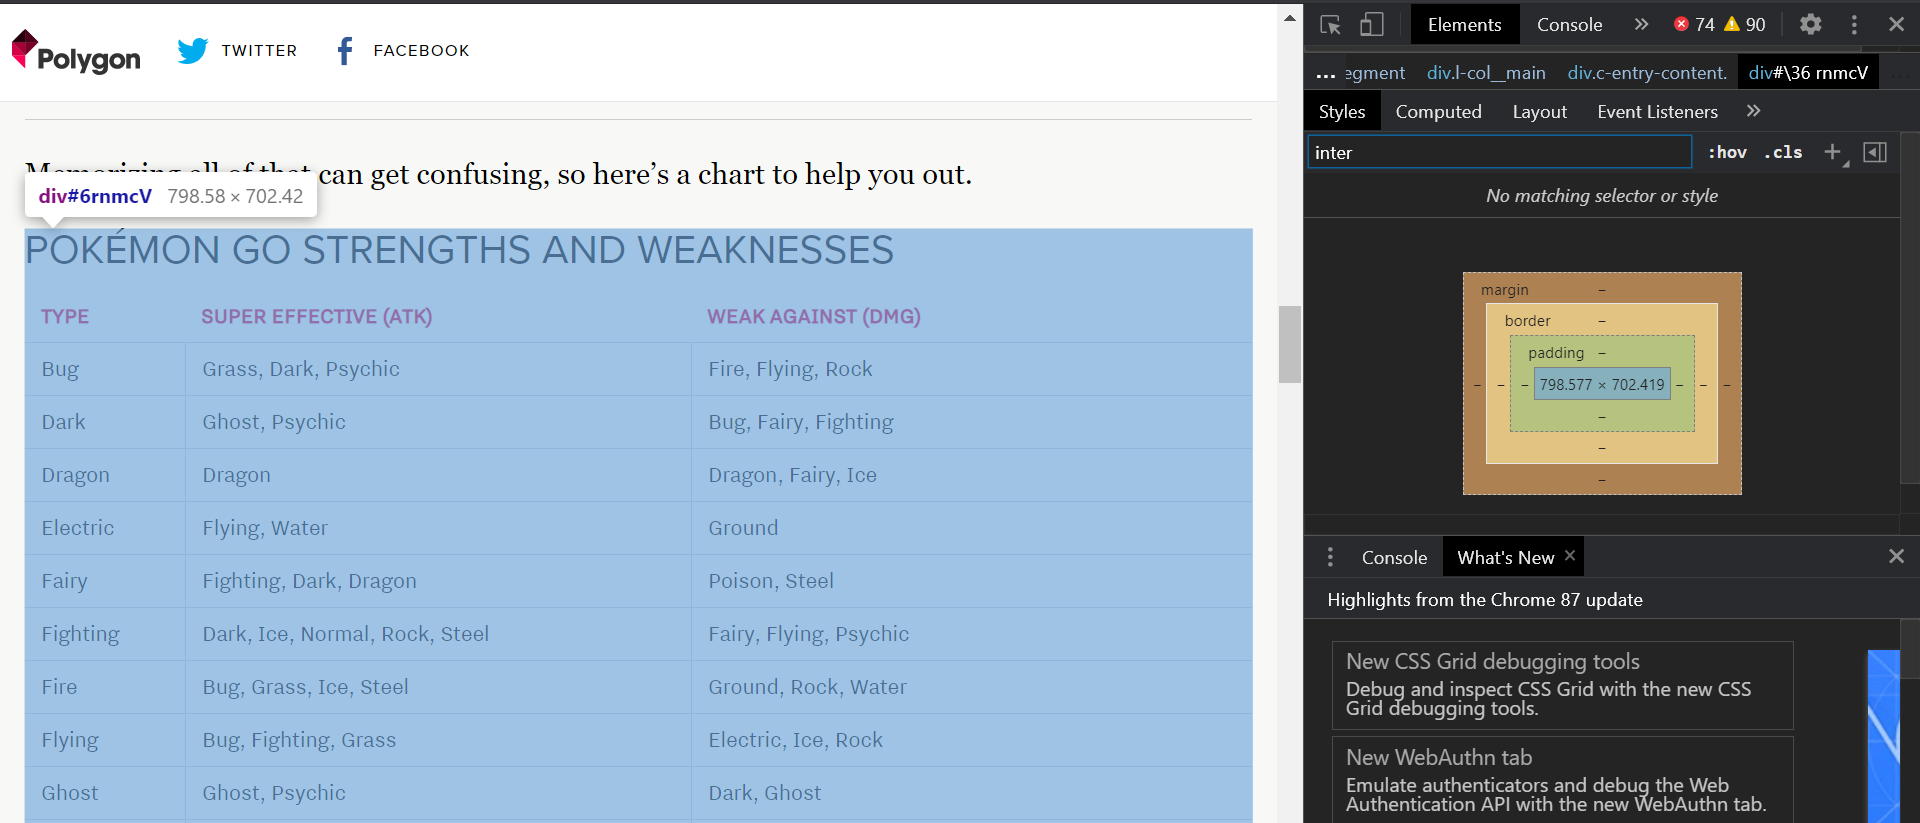

id = 6rnmcv

In [34]:
table = soup.find(id='6rnmcv')
print(table)

None


###  Okay, so this is turning into a selenium walk-through, which I was hoping it wouldn't.

There seems to be an issue where the HTML is not being compiled by the JS before being sent to soup. We need to use the selenium web driver to get the JS to compile into a full HTML web page (just as chrome is doing for me on my browser) before we can pull the information to a table and read it.

Okay, so I guess

#### Enter: `selenium`

We're gonna go ahead and restart here because, why not! Fuck it. Might as iterate the problem again, and work through it linearly, so we can see how `selenium`, `requests`, and `bs4` fit together.

We are also going to import the `time` module so that we can 'wait' for the browser to load in the page, before doing our data gathering.

In [6]:
# import requests
import bs4
import time
import selenium


# I think of this as opening a browser
driver = webdriver.Chrome()

url = 'https://www.polygon.com/pokemon-go-guide/2020/2/4/21121160/type-strength-weakness-super-effective-weakness-chart'
driver.maximize_window()

# Request url
driver.get(url)

# Rest to load

time.sleep(5)

# Encodes content
content = driver.page_source.encode('utf-8').strip()

NameError: name 'webdriver' is not defined

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__']